# Berg - Pre- and Post-Processing module

**To do:**
- Check if order of GSD classes is preserved while doing the back calculation
- Check strange occurence of ca. 85% for z_1000 in GZ layer
- Check method overall

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
import re
import xarray

In [2]:
# Import local package
from compositional_data_kriging import pre_post_processing as ppp

In [3]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload

In [4]:
# Reload all packages (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

___

## Debug test

**To check:**
- Values that were used as input are correctly calculated after PPP module (new approach): TRUE

In [114]:
Debug_test = ppp.pre_processing_debug("../_DATA/Debug_test/Debugging_test1.xlsx", save_data=True, save_name="Test")

['Sheet2']
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  5.94568356e-01   2.29844137e-01   1.17904647e-01   5.76828596e-02
   7.39181140e-33]
10
0.594568356147
0.229844137186
0.117904647065
0.0576828596017
7.3918113954e-33
4 PCA components with variance sum 1.0 needed for obtaining sum of variance > 0.95
Sheet2
PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
           z_1000     z_710     z_500     z_355     z_250     z_180     z_125  \
hole_id                                                                         
1        0.459084  0.247886  0.623383 -0.530668 -0.269239 -0.130242  0.840218   
3        0.680100 -0.537915 -1.033115  0.368721 -0.395876 -0.121205 -0.041370   
5       -0.985128  0.555213 -0.052917  0.643109  1.253040  0.389851  1.110087   
7        1.203335 -0.330312  1.154250  1.243980 -0.024213 -0.599274 -1.113260   
9        0

In [115]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=1,
                   save_data=True)

Test GZ
GZ_z250_PC01_3x3.xlsx (3, 3)
GZ_z250_PC02_3x3.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 18
gridpoints: 9


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



KeyError: 'GZ'

In [116]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test2/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 3\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_3x3.asc.xlsx (3, 3)
Test_grid2_PC02_3x3.asc.xlsx (3, 3)
Test_grid2_PC03_3x3.asc.xlsx (3, 3)
Test_grid2_PC04_3x3.asc.xlsx (3, 3)
Number of grid points per file : 9.0
Number of grid points in total: 36
gridpoints: 9


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659191,
  -0.69751755247337033,
  0.18914200746951551,
  -0.0072163101895359452],
 [0.72833949755688343,
  -0.71461868098260573,
  -0.49976863073560568,
  0.1763323930624203],
 [-0.4937634552120822,
  0.31513734384823788,
  -1.1088455876412751,
  0.8211430338849256],
 [0.40800672818983519,
  -0.74578993116954462,
  0.60170358562432724,
  0.007275881659693173],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.54195691332951301],
 [-0.8042115053561576,
  0.37372541127062953,
  -0.66819352827403555,
  -0.12916528181306039],
 [-1.226763508862432,
  0.24380986741015301,
  1.411593377380993,
  0.43430021361089383],
 [-1.1245442747232059,
  0.34255416108369041,
  0.43327868808589748,
  -0.29822179321578762],
 [-0.01234030149841292,
  1.792881040177529,
  -0.19625552515151989,
  -0.70627002397676941]]

In [117]:
ppp.post_processing_debug("../_DATA/Debug_test/data_Test3/GZ/", 
                   Debug_test[0],
                   Debug_test[1],
                   grid_data="ncols 4\n" +
                             "nrows 3\n" +
                             "xllcorner -0.5\n" +
                             "yllcorner -0.5\n" +
                             "cellsize 1\n" +
                             "nodata_value 1.7014100000000001E+038\n",
                   n_components=4,
                   save_data=True)

Test GZ
Test_grid2_PC01_4x3.asc.xlsx (3, 4)
Test_grid2_PC02_4x3.asc.xlsx (3, 4)
Test_grid2_PC03_4x3.asc.xlsx (3, 4)
Test_grid2_PC04_4x3.asc.xlsx (3, 4)
Number of grid points per file : 12.0
Number of grid points in total: 48
gridpoints: 12


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[[3.4945128049659182,
  -0.69751755247337077,
  0.18914200746951551,
  0.18914200746951551],
 [0.90852411867111704,
  -0.99658785697385821,
  -0.36728603911925928,
  -0.36728603911925928],
 [-0.048336401881971969,
  -0.3954841702238801,
  -0.77924003861716273,
  -0.77924003861716273],
 [-0.49376345521208398,
  0.31513734384823788,
  -1.1088455876412739,
  -1.1088455876412739],
 [0.4015189057058195,
  -0.71836721972082873,
  0.59426120667626381,
  0.59426120667626381],
 [-1.7616455393929931,
  -1.65431069896255,
  -0.29563427205771348,
  -0.29563427205771348],
 [-0.70924669840078547,
  0.10414603441533581,
  -0.57965231473585521,
  -0.57965231473585521],
 [-0.49643719541894121,
  0.86495957747846886,
  -0.81233646129295201,
  -0.81233646129295201],
 [-1.2267635088624309,
  0.2438098674101529,
  1.4115933773809921,
  1.4115933773809921],
 [-1.131032097207219,
  0.36997687253240669,
  0.42583630913783438,
  0.42583630913783438],
 [-0.012340301498410479,
  1.7928810401775299,
  -0.19625552

___

## Pre-processing

In [109]:
# Berg pre-processing
Berg_preprocessed_results = ppp.pre_processing("../_DATA/Berg_usable_data.xlsx", save_data=False, save_name="Berg_usable_data_pca");

['TZ', 'IZ', 'GZ']
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  6.73303114e-01   1.41746025e-01   9.51048346e-02   5.30534708e-02
   2.85929617e-02   6.28778488e-03   1.63984611e-03   1.93529805e-04
   7.84333067e-05   1.38165090e-32]
10
0.673303113897
0.14174602492
0.0951048345842
0.0530534707997
0.0285929616987
0.00628778487514
0.00163984611385
0.000193529804529
7.84333067286e-05
1.38165089973e-32
4 PCA components with variance sum 0.963207444201 needed for obtaining sum of variance > 0.95
PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[  5.93016351e-01   2.20185907e-01   8.31471179e-02   8.13839443e-02
   1.43367480e-02   6.85141256e-03   8.01939596e-04   1.79600188e-04
   9.69795273e-05   2.06620320e-32]
10
0.593016351318
0.220185906636
0.0831471179072
0.081383944296
0.014336747968
0.00685141256387
0.000801939595528
0.000179600188109
9.6

In [14]:
# MHZ pre-processing
MHZ_preprocessed_results = ppp.pre_processing("../_DATA/MHZ_usable_data.xlsx", save_data=False, save_name="MHZ_usable_data_pca");

['TZ', 'IZ', 'GZ']
0.98948928925
0.990465715157
0.986404984465


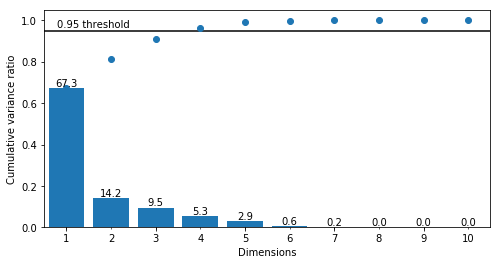

In [112]:
ppp.intr_dim(Berg_preprocessed_results[0]["TZ"], n_comp=10, cumul=True, bar=True)

___

## Post_processing

In [110]:
# Berg
for code_geol in ["TZ", "IZ", "GZ"]:
    for i in range(1,10):
        ppp.post_processing("../_KRIGING/Kriged_pca_data_Berg/" + code_geol + "/", 
                        Berg_preprocessed_results[0], 
                        Berg_preprocessed_results[1],
                        grid_data="ncols 100\n" +
                                  "nrows 90\n" +
                                  "xllcorner 5.6208707817415728\n" +
                                  "yllcorner 50.959635321741573\n" +
                                  "cellsize 0.00013419651685393446\n" +
                                  "nodata_value 1.7014100000000001E+038\n",
                        n_components=i,
                        save_data=False);

Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transformed_PC01.asc.xlsx (90, 100)
Upper_transformed_PC02.asc.xlsx (90, 100)
Upper_transformed_PC03.asc.xlsx (90, 100)
Upper_transformed_PC04.asc.xlsx (90, 100)
Upper_transformed_PC05.asc.xlsx (90, 100)
Upper_transformed_PC06.asc.xlsx (90, 100)
Upper_transformed_PC07.asc.xlsx (90, 100)
Upper_transformed_PC08.asc.xlsx (90, 100)
Upper_transformed_PC09.asc.xlsx (90, 100)
Number of grid points per file : 9000.0
Number of grid points in total: 81000
gridpoints: 9000
Berg TZ
Upper_transfo

In [98]:
# MHZ TZ and IZ
for code_geol in ["TZ", "IZ"]:
    for i in range(1,10):
        ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ/" + code_geol + "/", 
                        MHZ_preprocessed_results[0], 
                        MHZ_preprocessed_results[1],
                        grid_data="ncols 100\n" +
                                  "nrows 81\n" +
                                  "xllcorner 5.5967107547500001\n" +
                                  "yllcorner 50.982328804750004\n" + 
                                  "cellsize 0.00017565049999994641\n" +
                                  "nodata_value 1.7014100000000001E+038\n",
                        n_components=i,
                        save_data=False);

MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid point in total: 72900


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number of grid point in total: 72900
gridpoints: 8100
MHZ TZ
Upper_transformed_MHZ_PC01.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC02.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC03.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC04.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC05.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC06.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC07.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC08.asc.xlsx (81, 100)
Upper_transformed_MHZ_PC09.asc.xlsx (81, 100)
Number of grid points per file : 8100.0
Number 

In [25]:
# MHZ GZ
for code_geol in ["GZ"]:
    for i in range(1,10):
        ppp.post_processing("../_KRIGING/Kriged_pca_data_MHZ/" + code_geol + "/", 
                        MHZ_preprocessed_results[0], 
                        MHZ_preprocessed_results[1],
                        grid_data="ncols 100\n" +
                                  "nrows 74\n" +
                                  "xllcorner 5.5967023331506844\n" +
                                  "yllcorner 50.982320383150686\n" + 
                                  "cellsize 0.00019249369863007826\n" +
                                  "nodata_value 1.7014100000000001E+038\n",
                        n_components=i,
                        save_data=False);

MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid point in total: 66600


C:\Users\u0108248\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number of grid point in total: 66600
gridpoints: 7400
MHZ GZ
Lower_transformed_MHZ_PC01.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC02.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC03.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC04.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC05.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC06.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC07.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC08.asc.xlsx (74, 100)
Lower_transformed_MHZ_PC09.asc.xlsx (74, 100)
Number of grid points per file : 7400.0
Number 